In [54]:
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [55]:
#εισαγωγή του συνόλου δεδομένων
dataset=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [56]:
dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [57]:
#περιγραφικά στατιστικά συνόλου δεδομένων
dataset.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [58]:
#έλεγχος κενών τιμών στα δεδομένα
dataset.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

/var/folders/24/zglgqpr53l7_qk7br0pmq3c40000gq/T/ipykernel_20312/3430315818.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


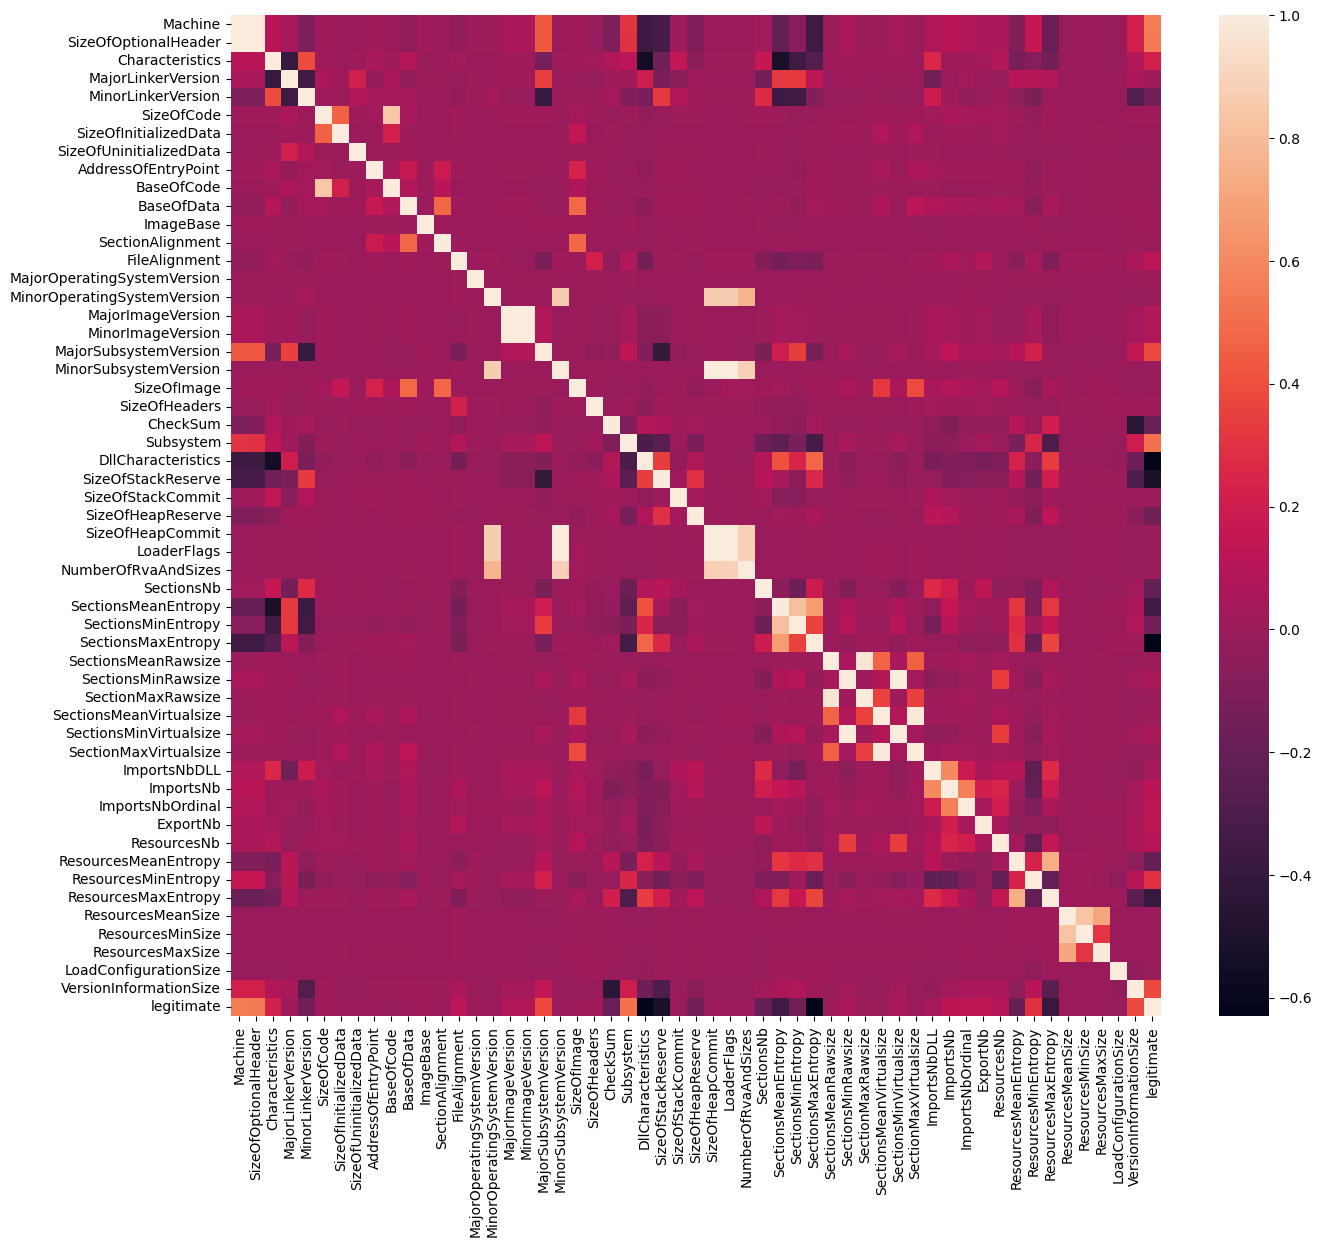

In [61]:

#πίνακας συσχέτισης χαρακτηριστικών του συνόλου δεδομένων
plt.figure(figsize=(15,13))
sns.heatmap(dataset.corr())
plt.show()

In [62]:
# for each column of a dataframe, print its type and a boolean for when value(s) is(are) missing

for column in dataset.columns:
    print(f"Column: {column}")
    print(f"Type: {dataset[column].dtype}")
    print(f"Missing values: {dataset[column].isna().any()}")
    print("-----------------------------")

Column: Name
Type: object
Missing values: False
-----------------------------
Column: md5
Type: object
Missing values: False
-----------------------------
Column: Machine
Type: int64
Missing values: False
-----------------------------
Column: SizeOfOptionalHeader
Type: int64
Missing values: False
-----------------------------
Column: Characteristics
Type: int64
Missing values: False
-----------------------------
Column: MajorLinkerVersion
Type: int64
Missing values: False
-----------------------------
Column: MinorLinkerVersion
Type: int64
Missing values: False
-----------------------------
Column: SizeOfCode
Type: int64
Missing values: False
-----------------------------
Column: SizeOfInitializedData
Type: int64
Missing values: False
-----------------------------
Column: SizeOfUninitializedData
Type: int64
Missing values: False
-----------------------------
Column: AddressOfEntryPoint
Type: int64
Missing values: False
-----------------------------
Column: BaseOfCode
Type: int64
Missin

In [63]:
# Remove feature with categorical values
dataset= dataset.drop('Name', axis=1)

# Regression related predictions

In [18]:
pps_matrix = pps.matrix(dataset)

In [19]:
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,md5,md5,1.0,predict_itself,True,None,0.0000,1.000000e+00,None
1,md5,Machine,0.0,feature_is_id,True,None,0.0000,0.000000e+00,None
2,md5,SizeOfOptionalHeader,0.0,feature_is_id,True,None,0.0000,0.000000e+00,None
3,md5,Characteristics,0.0,feature_is_id,True,None,0.0000,0.000000e+00,None
4,md5,MajorLinkerVersion,0.0,feature_is_id,True,None,0.0000,0.000000e+00,None
...,...,...,...,...,...,...,...,...,...
3131,legitimate,ResourcesMinSize,0.0,regression,True,mean absolute error,830.1086,1.454941e+03,DecisionTreeRegressor()
3132,legitimate,ResourcesMaxSize,0.0,regression,True,mean absolute error,246876.1302,4.170181e+05,DecisionTreeRegressor()
3133,legitimate,LoadConfigurationSize,0.0,regression,True,mean absolute error,544498.1538,1.090939e+06,DecisionTreeRegressor()
3134,legitimate,VersionInformationSize,0.0,regression,True,mean absolute error,4.2926,4.757744e+00,DecisionTreeRegressor()


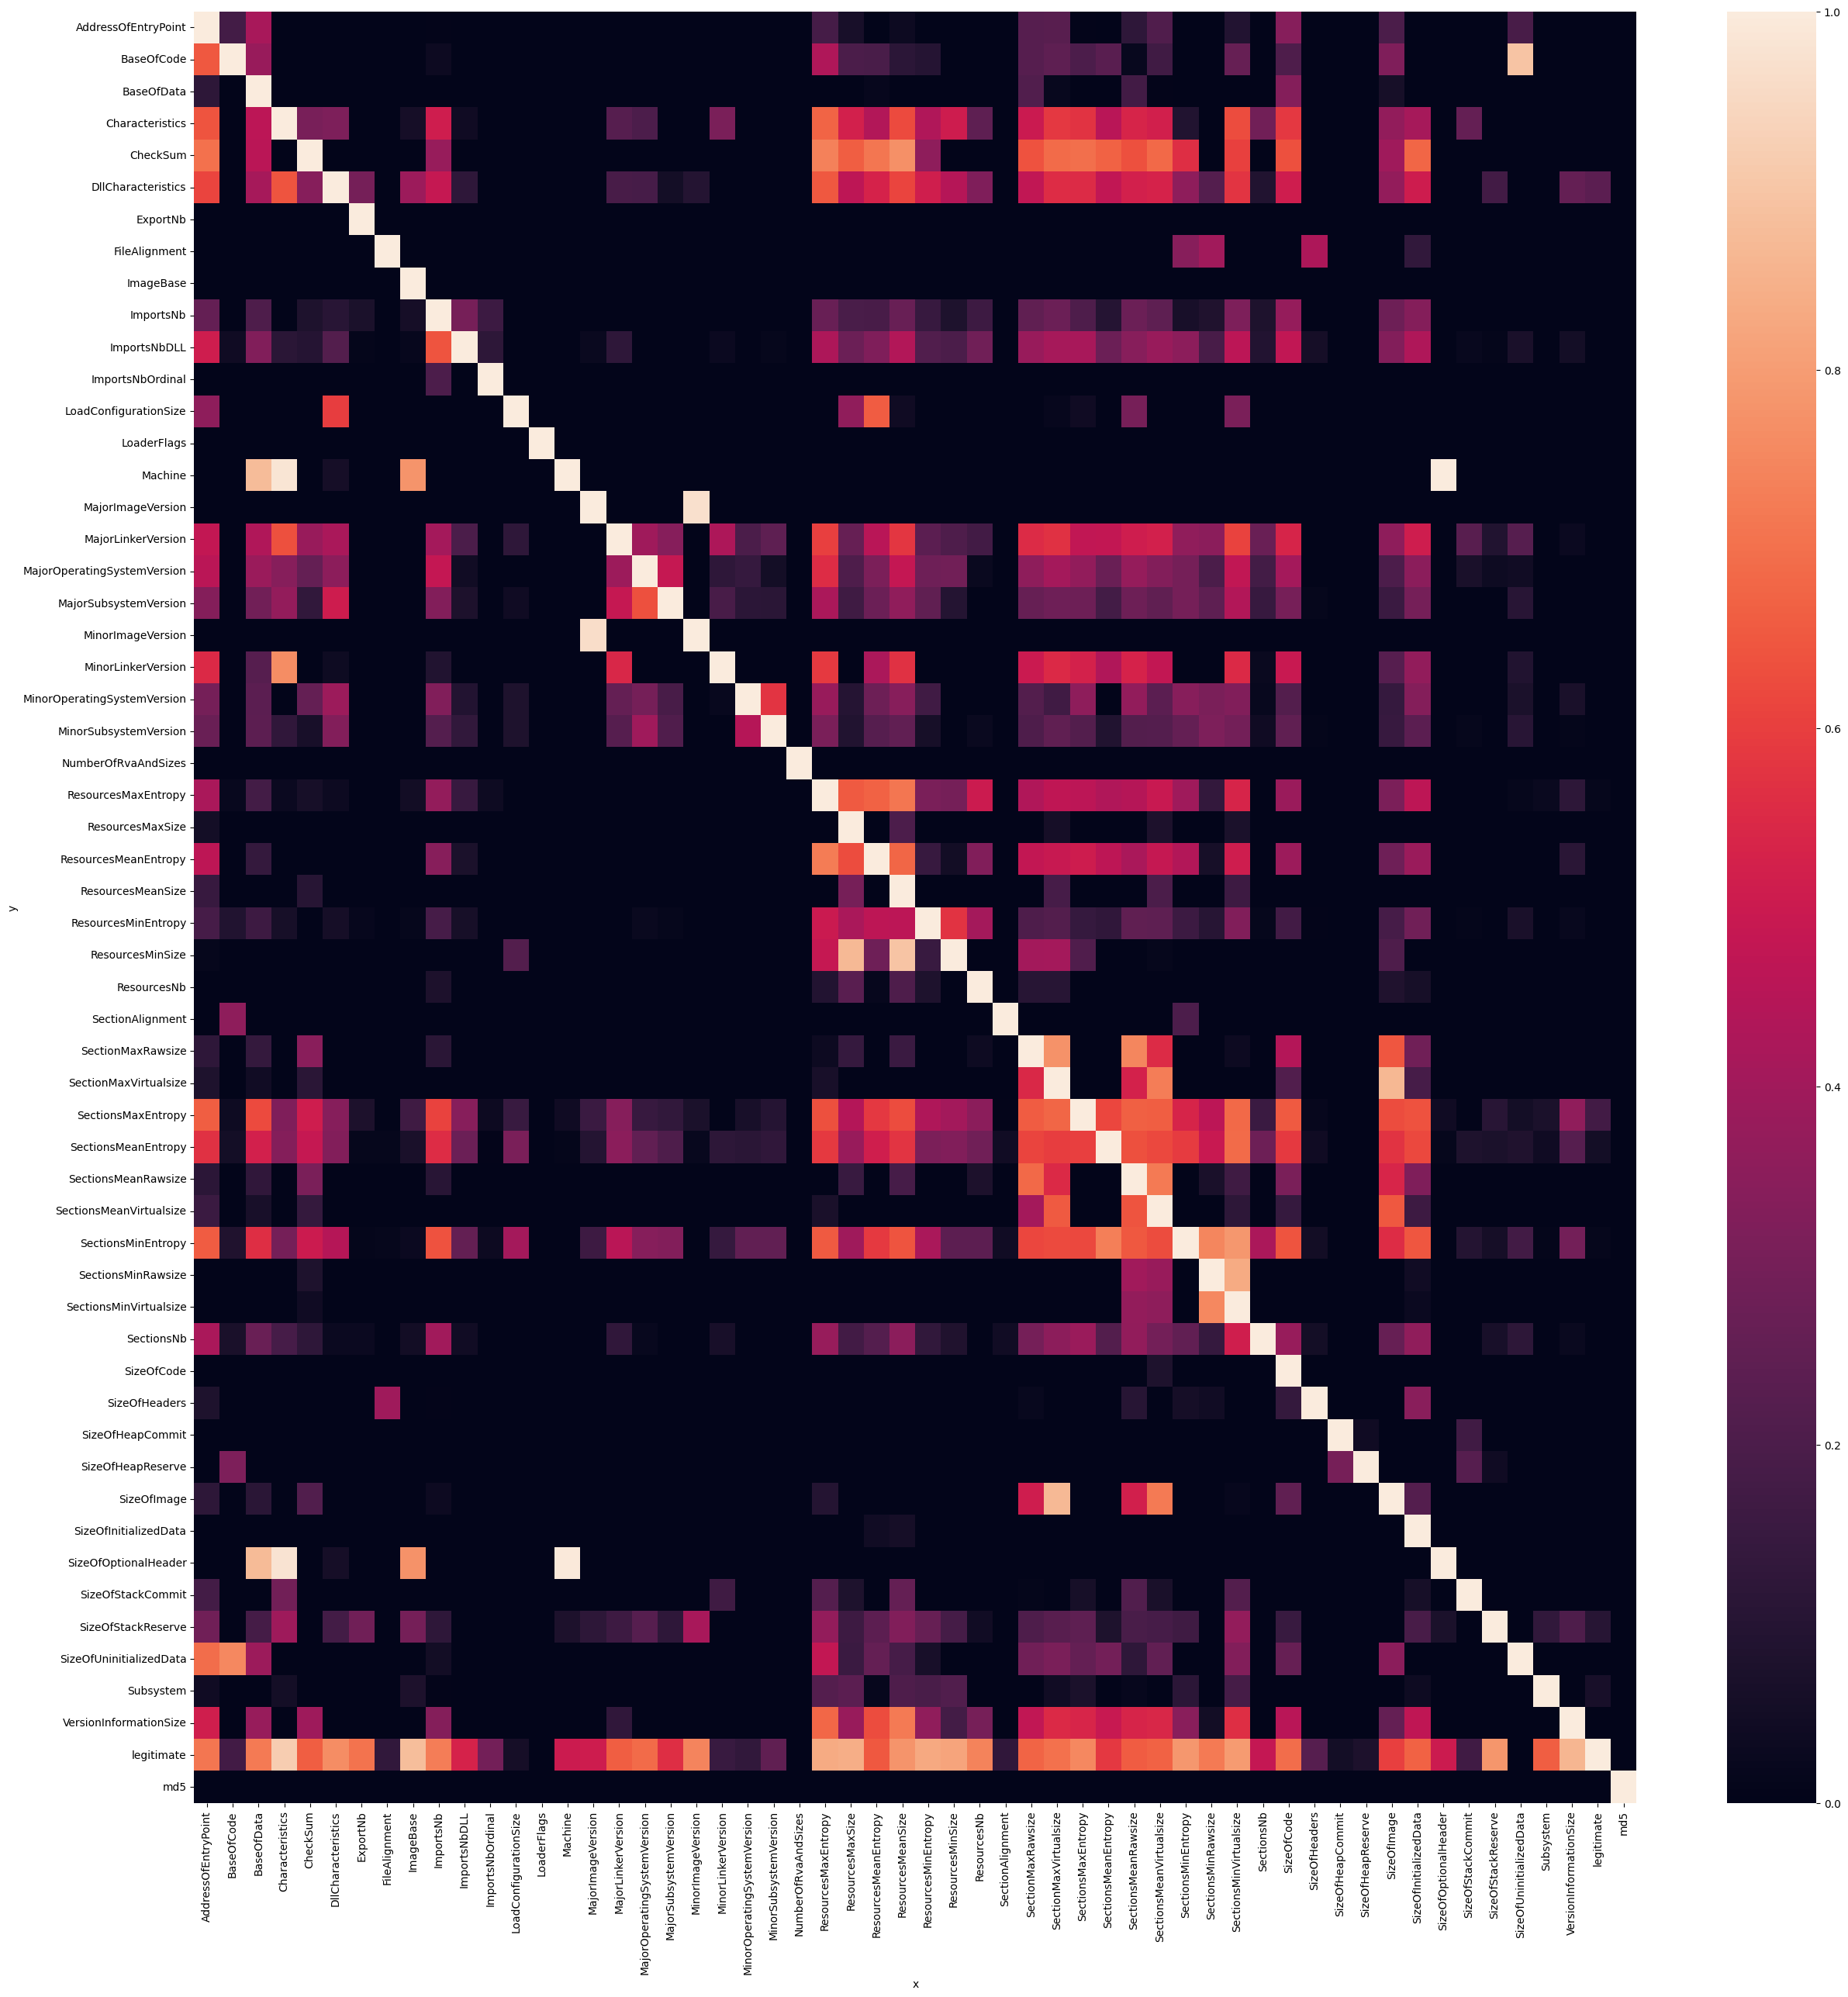

In [20]:
plt.figure(figsize=(30,30))
sns.heatmap(pps_matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore'))
plt.show()

# Classification-related predictions

In [64]:
# The choice of the case (classification or regression) has an influence on the final PPS and thus it is important that the correct case is chosen. The case is chosen based on the data types of the columns. That means, e.g. if you want to change the case from regression to classification that you have to change the data type from float to string.
# Later on we will deal with a classificaqtion task.
# So the pps should provide scores tailored for classification task.
# This can be achieved by changing the data type of the column 'legitimate' (our column with the labels)
dataset['legitimate'] = dataset['legitimate'].astype(str)
predictors_df = pps.predictors(dataset, y="legitimate")
predictors_df
# Now we can use the top 20 features to continue our analysis.
# Or altyernatively we set a threshold (e.g 0.7) for the ppscore. Www are keeping features that whose ppscore>=0.7.
# This way we reduce the computations needed downstream.

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Characteristics,legitimate,0.921640,classification,True,weighted F1,0.576,0.966775,DecisionTreeClassifier()
1,ImageBase,legitimate,0.881642,classification,True,weighted F1,0.576,0.949816,DecisionTreeClassifier()
2,VersionInformationSize,legitimate,0.862557,classification,True,weighted F1,0.576,0.941724,DecisionTreeClassifier()
3,ResourcesMaxSize,legitimate,0.840496,classification,True,weighted F1,0.576,0.932370,DecisionTreeClassifier()
4,ResourcesMaxEntropy,legitimate,0.832705,classification,True,weighted F1,0.576,0.929067,DecisionTreeClassifier()
5,ResourcesMinEntropy,legitimate,0.828263,classification,True,weighted F1,0.576,0.927184,DecisionTreeClassifier()
6,ResourcesMinSize,legitimate,0.817320,classification,True,weighted F1,0.576,0.922544,DecisionTreeClassifier()
7,SectionsMinVirtualsize,legitimate,0.796551,classification,True,weighted F1,0.576,0.913738,DecisionTreeClassifier()
8,SectionsMinEntropy,legitimate,0.786697,classification,True,weighted F1,0.576,0.909559,DecisionTreeClassifier()
9,SizeOfStackReserve,legitimate,0.783531,classification,True,weighted F1,0.576,0.908217,DecisionTreeClassifier()


In [66]:
top_predictors_df = predictors_df[predictors_df['ppscore'] >= 0.7]
top_predictors_df['x']

0            Characteristics
1                  ImageBase
2     VersionInformationSize
3           ResourcesMaxSize
4        ResourcesMaxEntropy
5        ResourcesMinEntropy
6           ResourcesMinSize
7     SectionsMinVirtualsize
8         SectionsMinEntropy
9         SizeOfStackReserve
10         ResourcesMeanSize
11        DllCharacteristics
12        SectionsMaxEntropy
13         MinorImageVersion
14               ResourcesNb
15                 ImportsNb
16        SectionsMinRawsize
17                BaseOfData
18       AddressOfEntryPoint
19                  ExportNb
20     SectionMaxVirtualsize
Name: x, dtype: object

In [67]:
# keep only top features
columns_to_keep = top_predictors_df['x'].to_list() 
columns_to_keep.append('legitimate')
dataset = dataset[columns_to_keep]

In [37]:
dataset

,Characteristics,ImageBase,VersionInformationSize,ResourcesMaxSize,ResourcesMaxEntropy,ResourcesMinEntropy,ResourcesMinSize,SectionsMinVirtualsize,SectionsMinEntropy,SizeOfStackReserve,...,DllCharacteristics,SectionsMaxEntropy,MinorImageVersion,ResourcesNb,ImportsNb,SectionsMinRawsize,BaseOfData,AddressOfEntryPoint,ExportNb,SectionMaxVirtualsize
0,258,4194304.0,16,18032,3.53793936419,2.56884382364,216,896,3.60742957555,1048576,...,1024,7.22105072892,0,4,0,1024,372736,6135,0,551848
1,3330,771751936.0,18,1156,5.08017686277,3.42074425303,518,1840,2.37352509596,1048576,...,33088,6.56690933416,0,2,181,2048,143360,81778,0,130296
2,3330,771751936.0,18,270376,5.27181275925,2.84644858861,104,21456,4.88519106848,1048576,...,32832,7.60095678141,0,11,235,21504,811008,350896,1,516760
3,258,771751936.0,18,4264,6.40071950185,2.66931388802,90,15208,5.64256492784,1048576,...,33088,7.59492880283,0,10,360,15360,798720,451258,1,585488
4,258,771751936.0,18,1300,5.19060266409,3.42159769887,849,2320,4.18228226649,1048576,...,33088,7.60830453625,0,2,194,2560,536576,217381,1,294816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,258,4194304.0,0,81654,7.67709054366,1.37025971212,16,16340,2.24718516235,1048576,...,33088,6.51636371892,0,7,133,7168,212992,123291,0,205644
138043,33167,4194304.0,15,67624,5.05007355156,2.03161908904,44,8,0.0,1048576,...,32768,6.56223225793,0,26,96,0,45056,40000,0,180988
138044,258,4194304.0,14,22648,7.99048736758,2.61702640237,48,9304,4.21793765714,1048576,...,33088,7.97742341552,0,22,107,9728,122880,59610,0,330808
138045,33166,4194304.0,0,2216,4.73974433385,2.06096404744,16,12,0.0,1048576,...,0,6.43118768365,0,10,101,0,53248,51216,0,48696


In [68]:
# Turn all features from int/float to string type.
dataset = dataset.applymap(str)
# Calculate again the PPS matrix.
pps_matrix = pps.matrix(dataset)

/Users/georgiostriantopoulos/Repos/Personal/ekpa-exercises-cybersecurity/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/georgiostriantopoulos/Repos/Personal/ekpa-exercises-cybersecurity/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/georgiostriantopoulos/Repos/Personal/ekpa-exercises-cybersecurity/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/georgiostriantopoulos/Repos/Personal/ekpa-exercises-cybersecurity/.conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is

In [69]:
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Characteristics,Characteristics,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
1,Characteristics,ImageBase,2.689035e-01,classification,True,weighted F1,0.604645,0.710957,DecisionTreeClassifier()
2,Characteristics,VersionInformationSize,2.725533e-01,classification,True,weighted F1,0.176600,0.401020,DecisionTreeClassifier()
3,Characteristics,ResourcesMaxSize,9.231001e-02,classification,True,weighted F1,0.118320,0.199708,DecisionTreeClassifier()
4,Characteristics,ResourcesMaxEntropy,9.432586e-02,classification,True,weighted F1,0.054241,0.143450,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
479,legitimate,BaseOfData,9.415375e-02,classification,True,weighted F1,0.073000,0.160281,DecisionTreeClassifier()
480,legitimate,AddressOfEntryPoint,6.902979e-03,classification,True,weighted F1,0.016600,0.023388,DecisionTreeClassifier()
481,legitimate,ExportNb,1.386802e-07,classification,True,weighted F1,0.698695,0.698695,DecisionTreeClassifier()
482,legitimate,SectionMaxVirtualsize,2.674101e-03,classification,True,weighted F1,0.009600,0.012248,DecisionTreeClassifier()


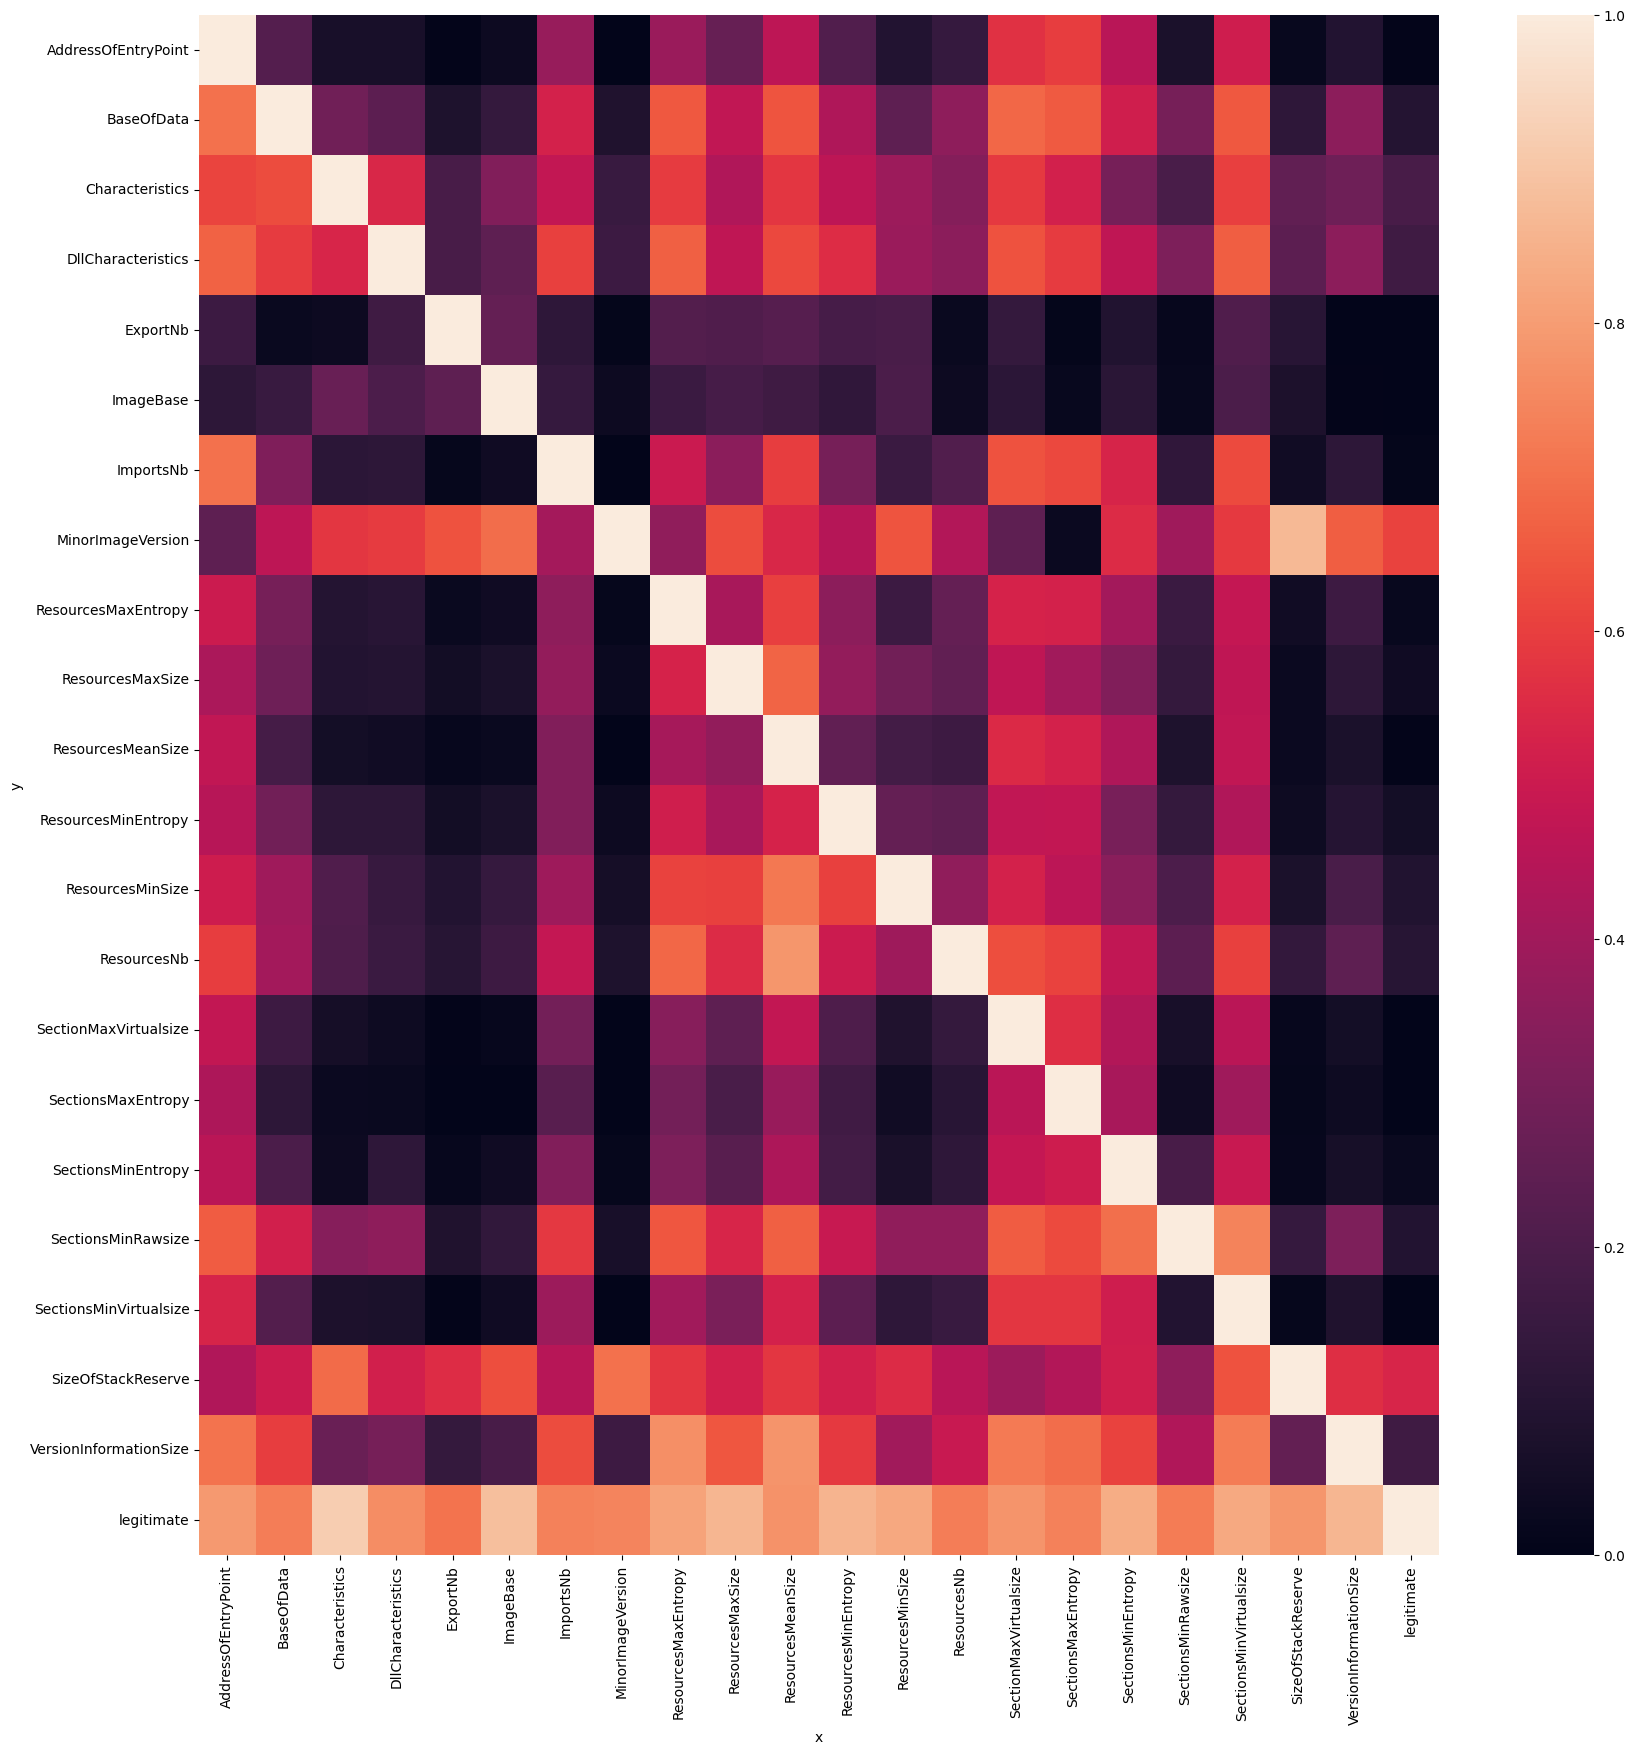

In [70]:
plt.figure(figsize=(20,20))
sns.heatmap(pps_matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore'))
plt.show()